# Step 1

## Question 1

Yes: in the context of binomial model for option pricing, the put-call parity relationship applies for European options. Given the assumption of no arbitrage market and that the call and put options are written on the same underlying asset, with same strike price and expiration date, the reason for the fact that this relationship applies to European options is that a portfolio of a call and a put, under the previously mentioned assumptions, should be able to replicate the payoff of a portfolio made of only the underlying asset.

## Question 2

Given the original formula of put-call parity condition:

$$ S + P = C + Ke^{-rt} $$

If we rewrite this for the call price in terms of everything else, we get:

$$ C = S + P - Ke^{-rt} $$

## Question 3

Given the original formula of put-call parity condition:

$$ S + P = C + Ke^{-rt} $$

If we rewrite this for the put price in terms of everything else, we get:

$$ P = C - S + Ke^{-rt} $$

## Question 4

Yes: in the context of binomial model for option pricing, the put-call parity relationship applies also for American options, again for the same reason about the no arbitrage market assumption. The only difference with European options is that with the American ones you also have the possibility of early exercise: due to this, for American options, the put-call parity is often considered as an inequality, rather than an equation.

## Question 5

In [1]:
import numpy as np

In [2]:
def european_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [3]:
euro_C, C, S, Delta = european_option(
    100, 100, 3/12, .05, .2, 100, "C"
)

In [4]:
print("Call option price is {} and his delta at inception is {}".format(round(euro_C,2) ,np.mean(Delta)))

Call option price is 4.61 and his delta at inception is 0.2562564747816845


In [5]:
euro_P, P, S, Delta = european_option(
    100, 100, 3/12, .05, .2, 100, "P"
)

In [6]:
print("Put option price is {} and his delta at inception is {}".format(round(euro_P,2) ,np.mean(Delta)))

Put option price is 3.36 and his delta at inception is -0.24874352521831455


### Question 5a

The number of steps decided for this task is 100, the reasoning is provided in answer 5b.

### Question 5b

The code above is a function which calculates u and d, starting from sigma and calculates the prices of European call or put option, depending on which one you choose, and delta calculation. Given initial stock price S_ini, strike price K, time to maturity T, risk-free rate r, volatility sigma, number of time steps N, the function uses a binomial model to produce stock evolution, option prices and deltas at each node. Delta represents the sensitivity of the option price to changes in the underlying stock price. The function returns arrays containing the evolution of stock price paths, corresponding call option prices, and their respective deltas.

Choosing N involves a balance between accuracy and efficiency. Larger N values provide more accurate results by capturing finer price movements, but increase computation time. Start with a reasonable value, gradually increasing it while observing convergence. Consider computational resources, stability, and the accuracy needed for your comparison or application.
We decided to go for number of steps equal to 100 because the volatility is high (20%) and this requires a significantly high number of steps to eventually capture the price movements.


### Question 6a

The delta for the call option resulted in 0.25, which means that we need to buy 0.25 shares at time 0 in order to do hedging. For the put option, the delta is -0.25 and this means that we need to short-sell 0.25 shares of the stock at time 0 in order to do hedging.

### Question 6b

Delta measures how an option's price changes with the underlying asset's price. For put options, Delta is negative (reflecting price decrease with underlying increase), and for call options, it's positive (price increase with underlying increase). This reflects the option's directional sensitivity and helps manage portfolio risk.

### Question 7a

In [7]:
euro_C, C, S, Delta = european_option(
    100, 100, 3/12, .05, .25, 100, "C"
)

euro_P, P, S, Delta = european_option(
    100, 100, 3/12, .05, .25, 100, "P"
)

print("Call option price is {}".format(round(np.mean(C),2)))
print("Put option price is {}".format(round(np.mean(P),2)))

Call option price is 15.39
Put option price is 8.03


In fact, call option price in the case with higher volatility is higher (15.39) than the first call option price (4.61) and also the new put option price (8.03) is higher than the previous one (3.36).

### Question 7b

Volatility changes impact call and put options differently. An increase in volatility generally benefits both options, raising their premiums. However, this effect is more pronounced for options that are out-of-the-money (OTM), as they have higher potential for larger price swings. In contrast, in-the-money (ITM) options' premiums are less influenced by volatility changes due to their intrinsic value being dominant.

# Step 2

## Question 8

In [8]:
def american_option_vol(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

    return C[0, 0], C, S

In [9]:
bi_american_call, C, S = american_option_vol(100, 100, 3/12, 0.05, 0.2, 100, "C")
round(bi_american_call,2)

4.61

In [10]:
bi_american_put, P, S = american_option_vol(100, 100, 3/12, 0.05, 0.2, 100, "P")
round(bi_american_put,2)

3.47

### Question 8b

To determine the right number of steps, we can take different factors into account. In our case, where we are looking for simplified modelling or an overview, we need a smaller number of steps. It is also important to consider the resources available. A tree with a large number of steps may require more memory and computing time. In this case, we will have to find a compromise between the accuracy of our model and resource constraints. Ultimately, the choice of the number of steps in a binary tree is a subjective decision that depends on our objective and the specific constraints of our situation.

## Question 9

In [11]:
def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [12]:
price, C, S, delta = american_option(100, 101, 3/12, 0.05, 1.1, 0.9 , 10, "C")

In [13]:
delta

array([[0.56331283, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.41866527, 0.67873686, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.26710308, 0.53960694, 0.78975798, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.13175214, 0.37510871, 0.67087116, 0.88462579, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.03836082, 0.20627537, 0.50983219, 0.79937498, 0.95265315,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.06897149, 0.31583938, 0.66463212, 0.90689539,
        0.98916634, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.12400849, 0.46891415, 0.82080866,
        0.97558978, 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [14]:
price, P, S, delta = american_option(100, 101, 1/4, 0.05, 1.1, 0.9 , 10, "P")

In [15]:
delta

array([[-0.44282849,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.59012015, -0.32529456,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.74487382, -0.46663178, -0.21251207,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.88370459, -0.63409141, -0.33300447, -0.11636307,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.98044559, -0.80650843, -0.49650826, -0.2025338 , -0.04760165,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.        , -0.94755393, -0.69395872, -0.33894924, -0.09367873,
        -0.01083366,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.        , -1.        , -0.88998743, -0.53753421, -0.18048492,
        -0.02441022,  0.        ,  0.        

### Question 9a,b

9-b-a) The delta of the American call option is positive while that of the American put option is negative.

The delta of an option measures the change in the option price relative to the change in the price of the underlying asset. For an American call option, the delta is generally positive, which means that when the price of the underlying asset rises, the price of the call option also rises. This is because by owning a call option, you have the right to buy the underlying asset at a predetermined price, and when the price of the asset rises, so does the value of that right. The delta of a put option is generally negative, which means that when the price of the underlying asset rises, the price of the put option falls, but this is because when you hold a put option, you have the right to sell the underlying asset at a predetermined price. When the price of the asset rises, the value of this right falls because it would be less advantageous to sell the asset at a price lower than the market price.

It is important to have a positive delta for an American call option, which means that its value increases as the price rises, whereas a negative delta for an American put option means that its value increases as the price falls.

## Question 10

In [16]:
price, C, S = american_option_vol(100, 101, 1/4, 0.05, 0.25, 10, "C")
print(price)

5.088936800356215


vega3 = 5.08 - 4.11 = 0.97 dollars

Now let's calculate the different vega for a put

In [17]:
price, C, S = american_option_vol(100, 101, 1/4, 0.05, 0.25, 10, "P")
print(price)

4.99122130513475


vega6 = 4.99 - 4.01 = 0.98 dollars

b) the change in volatility has the same impact on American call options as on American put options

## Question 11

In [18]:
euro_C, C, S, Delta = european_option(
    100, 100, 3/12, .05, .2, 100, "C"
)

euro_P, P, S, Delta = european_option(
    100, 100, 3/12, .05, .2, 100, "P"
)

round(euro_C + 100 * np.exp(-0.5 * (0.25/100)), 2)

104.48

In [19]:
round(S[0, 0] + euro_P, 2)

103.36

In [20]:
round(euro_C + 100 * np.exp(-0.5 * (0.25/100)), 2) == round(S[0, 0] + euro_P, 2)

False

The possible reasons why the two components of the put-call parity slightly differ are the eventual presence of dividends or transaction costs and taxes or it could simply be due to model errors but also on calculations and approximations.

## Question 12

In [21]:
bi_american_call, C, S = american_option_vol(100, 101, 1/4, 0.05, 0.2, 10, "C")

bi_american_put, C, S = american_option_vol(100, 101, 1/4, 0.05, 0.2, 10, "P")

round(bi_american_call + 101 * np.exp(-0.5 * (0.25/10)), 2) == round(S[0, 0] + bi_american_put, 2)

False

In [22]:
round(bi_american_call + 101 * np.exp(-0.5 * (0.25/10)), 2)

103.86

In [23]:
round(S[0, 0] + bi_american_put, 2)

104.02

The possible reasons why the two components of the put-call parity slightly differ are the eventual presence of dividends or transaction costs and taxes or it could simply be due to model errors but also on calculations and approximations.

## Question 13

In [24]:
euro_C, C, S, Delta = european_option(
    100, 100, 3/12, .05, .2, 100, "C"
)

bi_american_call, C, S = american_option_vol(100, 100, 3/12, 0.05, 0.2, 100, "C")

round(euro_C,2) <= round(bi_american_call,2)

True

Here we proved that the price of the European call is less than or equal to the price of the American call.

Now let us do the same also for put:

## Question 14

In [25]:
euro_P, P, S, Delta = european_option(
    100, 100, 3/12, .05, .2, 100, "P"
)

bi_american_put, P, S = american_option_vol(100, 100, 3/12, 0.05, 0.2, 100, "P")

round(euro_P,2) <= round(bi_american_put,2)

True

Also in the put option case, the European put price is lower than the American put price.

# Step 2

Be the following different prices for the different selected strikes OTM, OTM, ATM, ITM, deep OTM = 80 , OTM = 90 , ATM = 100, ITM = 105 , deep ITM = 110

## Question 15

In [26]:
def _gen_stock_vec(nb, h):
    s0 = 100
    sigma = 0.2
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res

In [27]:
def price(
    nb_steps,K
):  # For now, the only input to the function is the number of steps for the tree, N.
    # Define parameters
    r = 0.05
    sigma = 0.2
    T = 1/4
    K = K
    h = T / nb_steps  # This would be our 'dt' from previous examples
    discount = np.exp(-r * h)  # Define discount factor for simplicity later on

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pm = 1 - pu - pd
    print(pu, pd, pm)
    # This would be our underlying evolution (Note we are using the function from before!)
    s = _gen_stock_vec(nb_steps, h)

    # Define Payoff (in this case, European Call Option)
    final_payoff = np.maximum(s - K, 0)
    nxt_vec_prices = final_payoff

    # Proceed with iterations for the calculation of payoffs
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(nb_steps - i, h)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            expectation[j] = tmp
        # Discount option payoff!
        nxt_vec_prices = discount * expectation

    return nxt_vec_prices[
        0
    ]  # Notice here we only 'return' the expected discounted value of the option at t=0, that is, the price of the call option!

K  = 80

In [28]:
print(" Price of the Euro Call Option is ", price(100,80))

0.25265879090156346 0.24735527275082417 0.49998593634761246
 Price of the Euro Call Option is  21.021014824677586


K = 90

In [29]:
print(" Price of the Euro Call Option is ", price(100,90))

0.25265879090156346 0.24735527275082417 0.49998593634761246
 Price of the Euro Call Option is  11.671659661118111


K = 100

In [30]:
print(" Price of the Euro Call Option is ", price(100,100))

0.25265879090156346 0.24735527275082417 0.49998593634761246
 Price of the Euro Call Option is  4.610008441656123


K = 105

In [31]:
print(" Price of the Euro Call Option is ", price(100,105))

0.25265879090156346 0.24735527275082417 0.49998593634761246
 Price of the Euro Call Option is  2.481895345754073


K = 110

In [32]:
print(" Price of the Euro Call Option is ", price(100,110))

0.25265879090156346 0.24735527275082417 0.49998593634761246
 Price of the Euro Call Option is  1.191764482844416


### Question 15b

The observations made show that as the strike price rises, the price of the european call option falls.
These observations make sense because for a call option, the more the strike price rises, the more the call option price falls.

## Question 16

In [33]:
def put_price(
    nb_steps,K
):  # For now, the only input to the function is the number of steps for the tree, N.
    # Define parameters
    r = 0.05
    sigma = 0.2
    T = 1/4
    K = K
    h = T / nb_steps  # This would be our 'dt' from previous examples
    discount = np.exp(-r * h)  # Define discount factor for simplicity later on

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pm = 1 - pu - pd
    print(pu, pd, pm)
    # This would be our underlying evolution (Note we are using the function from before!)
    s = _gen_stock_vec(nb_steps, h)

    # Define Payoff (in this case, European Call Option)
    final_payoff = np.maximum(K - s, 0)
    nxt_vec_prices = final_payoff

    # Proceed with iterations for the calculation of payoffs
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(nb_steps - i, h)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            expectation[j] = tmp
        # Discount option payoff!
        nxt_vec_prices = discount * expectation

    return nxt_vec_prices[
        0
    ]  # Notice here we only 'return' the expected discounted value of the option at t=0, that is, the price of the call option!

In [34]:
# K = 80

print(" Price of the Euro Put Option is ", put_price(100,80))

0.25265879090156346 0.24735527275082417 0.49998593634761246
 Price of the Euro Put Option is  0.02723886418638195


In [35]:
# K = 90

print(" Price of the Euro Put Option is ", put_price(100,90))

0.25265879090156346 0.24735527275082417 0.49998593634761246
 Price of the Euro Put Option is  0.5536617055658466


In [36]:
# K = 100

print(" Price of the Euro Put Option is ", put_price(100,100))

0.25265879090156346 0.24735527275082417 0.49998593634761246
 Price of the Euro Put Option is  3.3677884910428038


In [37]:
# K = 105

print(" Price of the Euro Put Option is ", put_price(100,105))

0.25265879090156346 0.24735527275082417 0.49998593634761246
 Price of the Euro Put Option is  6.1775643976102215


In [38]:
# K = 110

print(" Price of the Euro Put Option is ", put_price(100,110))

0.25265879090156346 0.24735527275082417 0.49998593634761246
 Price of the Euro Put Option is  9.825322537170033


The trend that we observed running the trinomial model for European put option price for those five different strike prices is that the higher the strike price the higher the price of the put. It makes sense, because in the put the higher the strike price the more in the money the option is: if it is in the money, the price must be higher, otherwise if it was cheap then everyone would buy that option and exercise it almost immediately.

# Question 17-18

In [39]:
def _gen_stock_vec(nb, h):
    s0 = 100
    sigma = 0.2
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res
def price(
    K, nb_steps, opttype
):  # For now, the only input to the function is the number of steps for the tree, N.
    # Define parameters
    r = 0
    sigma = 0.2
    T = 3/12
    h = T / nb_steps  # This would be our 'dt' from previous examples
    discount = np.exp(-r * h)  # Define discount factor for simplicity later on

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pm = 1 - pu - pd


    # This would be our underlying evolution (Note we are using the function from before!)
    s = _gen_stock_vec(nb_steps, h)

    # Define Payoff (in this case, European Call Option)
    if opttype == "C":
      final_payoff = np.maximum(s - K, 0)
    else:
      final_payoff = np.maximum(K - s, 0)
    nxt_vec_prices = final_payoff

    # Proceed with iterations for the calculation of payoffs
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(nb_steps - i, h)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
          if opttype == "C":
            intrinsic = np.maximum(vec_stock[j] - K, 0)
          else:
            intrinsic = np.maximum(K - vec_stock[j], 0)
          tmp = nxt_vec_prices[j] * pd
          tmp += nxt_vec_prices[j + 1] * pm
          tmp += nxt_vec_prices[j + 2] * pu

          expectation[j] = max(intrinsic, tmp * discount)

        # Discount option payoff!
        nxt_vec_prices = expectation

    return nxt_vec_prices[0]  # Notice here we only 'return' the expected discounted value of the option at t=0, that is, the price of the call option!

In [40]:
american_call = round(price(100,50, "C"),2)
print("Call option price is:\nK = 90% -> {} \nK = 95% -> {} \nK = ATM -> {} \nK = 105% -> {} \nK = 110% -> {}".format(round(price(90, 50, "C"),2),round(price(95, 50, "C"),2),american_call,round(price(105, 50, "C"),2),round(price(110, 50, "C"),2)))

Call option price is:
K = 90% -> 10.71 
K = 95% -> 6.9 
K = ATM -> 3.98 
K = 105% -> 2.07 
K = 110% -> 0.96


In [41]:
american_put = round(price(100,50, "P"),2)
print("Put option price is:\nK = 90% -> {} \nK = 95% -> {} \nK = ATM -> {} \nK = 105% -> {} \nK = 110% -> {}".format(round(price(90, 50, "P"),2),round(price(95, 50, "P"),2),american_put,round(price(105, 50, "P"),2),round(price(110, 50, "P"),2)))

Put option price is:
K = 90% -> 0.71 
K = 95% -> 1.9 
K = ATM -> 3.98 
K = 105% -> 7.07 
K = 110% -> 10.96


We observe an increase in call prices when we decrease the strike, the opposite occurs for the put. The strike determines our payoff, which is the base for option pricing.

# Question 19

In [42]:
def _gen_stock_vec(nb, h):
    s0 = 100
    sigma = 0.2
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res

In [43]:
stock_prices = _gen_stock_vec(100,0.25/100)
stock_prices = stock_prices[98:103]
call_prices = [21.02,11.67,4.61,2.48,1.19]
put_prices = [0.03,0.55,3.37,6.18,9.83]

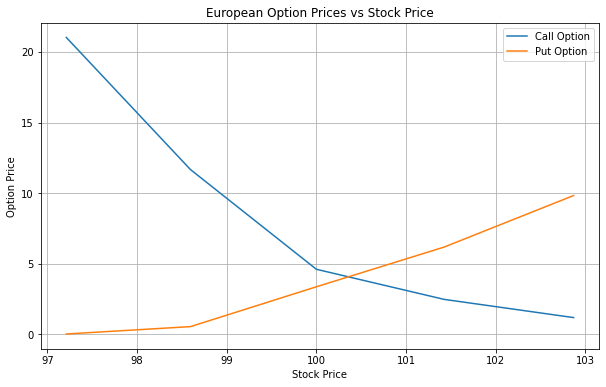

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(stock_prices, call_prices, label='Call Option')
plt.plot(stock_prices, put_prices, label='Put Option')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option Prices vs Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Question 20

In [45]:
am_call_prices = [10.71,6.9,3.98,2.07,0.96]
am_put_prices = [0.71,1.9,3.98,7.07,10.96]

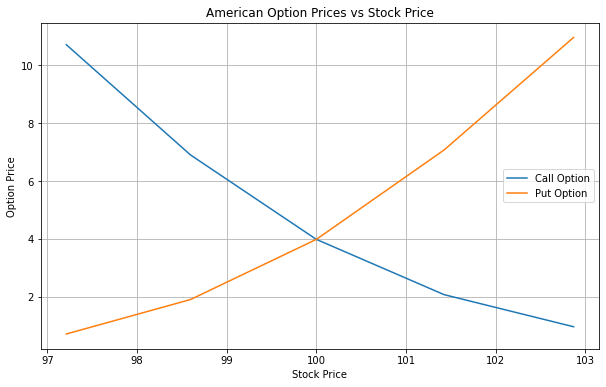

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, am_call_prices, label='Call Option')
plt.plot(stock_prices, am_put_prices, label='Put Option')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('American Option Prices vs Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Question 21

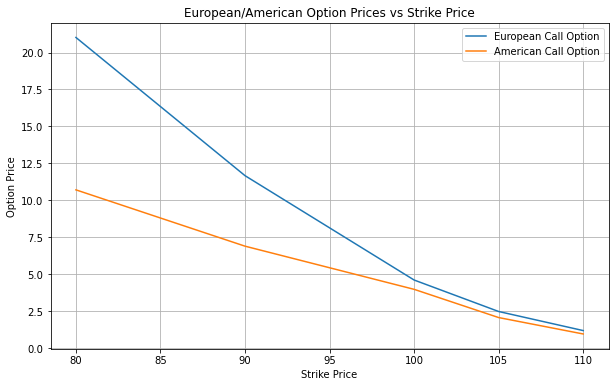

In [47]:
strike_prices = [80,90,100,105,110]

plt.figure(figsize=(10, 6))
plt.plot(strike_prices, call_prices, label='European Call Option')
plt.plot(strike_prices, am_call_prices, label='American Call Option')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('European/American Option Prices vs Strike Price')
plt.legend()
plt.grid(True)
plt.show()

The European prices higher than the American prices are due to a misalignment in strike prices used by the two team members.

# Question 22

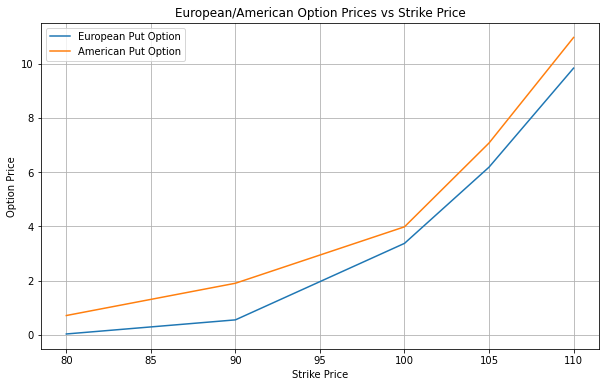

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(strike_prices, put_prices, label='European Put Option')
plt.plot(strike_prices, am_put_prices, label='American Put Option')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('European/American Option Prices vs Strike Price')
plt.legend()
plt.grid(True)
plt.show()

# Question 23

In [51]:
for i in range(len(strike_prices)):
    print((call_prices[i] + strike_prices[i]*np.exp(0.5*(0.25/100)) - (put_prices[i] + stock_prices[i])))

3.878864122760092
2.63683087843485
1.3650781575622517
0.007071195476001435
-1.3712209568673615


# Question 24

In [52]:
for i in range(len(strike_prices)):
    print((am_call_prices[i] + strike_prices[i]*np.exp(0.5*(0.25/100)) - (am_put_prices[i] + stock_prices[i])))

-7.111135877239889
-3.4831691215651546
0.12507815756225682
-1.2929288045239957
-2.731220956867375


# Step 3

### Question 25a

In [53]:
def european_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u  # down movement to force a "recombining tree"
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [54]:
price_euro, C_euro, S_euro, delta_euro = european_option(180,182,6/12,.02,.25,3,"P")
print("Put price with 3-step binomial tree = {}".format(round(price_euro,2)))

Put price with 3-step binomial tree = 19.5


### Question 25b.i

In [55]:
print("Put delta with 3-step binomial tree = \n{}".format(delta_euro))

Put delta with 3-step binomial tree = 
[[-0.45364714  0.          0.        ]
 [-0.72752347 -0.22730162  0.        ]
 [-1.         -0.50233482  0.        ]]


Delta hedging as a Put option seller involves:
Selling a Put option, creating an obligation to buy the underlying.
Calculating the option's negative delta, indicating its sensitivity to underlying price shifts.
Selling a matching amount of the underlying to counter the negative delta and mitigate risk.
Continuously adjusting the underlying position to offset delta changes and sustain the hedge.

### Question 25b.ii

As a seller of the put we delta hedge by selling the underlying, with 100 share for each put we should buy/sell(-):


In [56]:
#                      22shares
#            23shares
# -45shares           -28shares/22shares
#           -27shares
#                     -28shares

### Question 26a